# Assignment 1: House Sales Prediction

## 1. Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Understanding

In [2]:
house_df=pd.read_csv("train.csv")

#- Reading the initial rows
house_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking shape of dataset
house_df.shape

(1460, 81)

In [4]:
#checking info of dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Reading the parameters of numerical data.
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#  Cleaning and visualizing the data

In [6]:
# Finding out the null value percentage of all the columns.
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [7]:
# Replacing null value with meaningful name in some columns which have specific meaning.
house_df['BsmtQual'] = house_df['BsmtQual'].replace(np.nan, 'NoBasementQual')
house_df['BsmtCond'] = house_df['BsmtCond'].replace(np.nan, 'NoBasementCond')
house_df['BsmtExposure'] = house_df['BsmtExposure'].replace(np.nan, 'NoBasementExposer')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].replace(np.nan, 'NoBasementFinType1')
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].replace(np.nan, 'NoBasementFinType2')
house_df['FireplaceQu'] = house_df['FireplaceQu'].replace(np.nan, 'NoFireplaceQu')
house_df['GarageType'] = house_df['GarageType'].replace(np.nan, 'NoGarageType')
house_df['GarageFinish'] = house_df['GarageFinish'].replace(np.nan, 'NoGarageFinish')
house_df['GarageQual'] = house_df['GarageQual'].replace(np.nan, 'NoGarageQual')
house_df['GarageCond'] = house_df['GarageCond'].replace(np.nan, 'NoGarageCond')
house_df['PoolQC'] = house_df['PoolQC'].replace(np.nan, 'NoPoolQC')
house_df['Fence'] = house_df['Fence'].replace(np.nan, 'NoFence')
house_df['MiscFeature'] = house_df['MiscFeature'].replace(np.nan, 'NoMiscFeature')
house_df['Alley'] = house_df['Alley'].replace(np.nan, 'NoAlley')

In [8]:
# Removing the columns having more than 40% of null values.cols = df.columns
cols = house_df.columns
for i in cols:
    if((100*(house_df[i].isnull().sum()/len(house_df.index))) >= 40):
        print(i)
        house_df.drop(i, 1, inplace = True)

In [9]:
# After removing checking shape of dataframe.
house_df.shape

(1460, 81)


- No rows have null values greater than 40%.
- Observing first 5 rows of dataframe



In [10]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPoolQC,NoFence,NoMiscFeature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPoolQC,NoFence,NoMiscFeature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPoolQC,NoFence,NoMiscFeature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPoolQC,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPoolQC,NoFence,NoMiscFeature,0,12,2008,WD,Normal,250000


- Categorising Yes/No type columns to 0/1 type columns for numerical analysis.

In [11]:
house_df['CentralAir'] = house_df['CentralAir'].map({'Y': 1, 'N': 0})

- Finding out the unique count of all the columns. We can remove the columns having only one unique value.

In [12]:
house_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

- Checking for columns having 1 values only.

In [13]:
(house_df.nunique()==1).sum()

0

- Creating another dataframe which will contain all numerical columns 

In [14]:
num_df = house_df.select_dtypes(include=['int64','float64'])

- Checking null values count in numerical columns.

In [15]:
num_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Imputing null values for all missing values columns.

- Viewing LotFrontage column to find out which is best way to impute null values in this column.

In [16]:
num_df['LotFrontage'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

- Plotting BoxPlot for LotFrontage column.

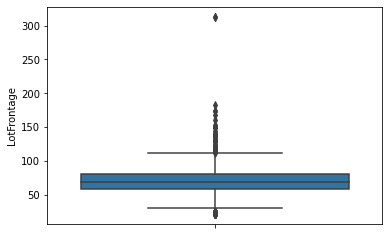

In [17]:
sns.boxplot(y=house_df.LotFrontage, data=house_df)
plt.show()

- Since data have lot of outliers, it will be best to replace null vallues with median.

In [18]:
house_df['LotFrontage'].replace(np.NaN,num_df['LotFrontage'].median(),inplace=True)

- Viewing MasVnrArea column to find out which is best way to impute null values in this column.

In [19]:
num_df['MasVnrArea'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

- Plotting BoxPlot for MasVnrArea column.

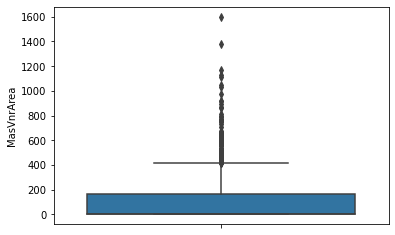

In [20]:
sns.boxplot(y=house_df.MasVnrArea, data=house_df)
plt.show()

- Since data have lot of outliers, it will be best to replace null vallues with median.

In [21]:
house_df['MasVnrArea'].replace(np.NaN,num_df['MasVnrArea'].median(),inplace=True)

- Viewing GarageYrBlt column to find out which is best way to impute null values in this column.

In [22]:
num_df['GarageYrBlt'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

- Since data do not have outliers, it will be best to replace null vallues with mean.

In [23]:
house_df['GarageYrBlt'].replace(np.NaN,num_df['GarageYrBlt'].mean(),inplace=True)

### Checking the spread of data, i.e. the value counts in the categorical columns.

In [24]:
catog_df = house_df.select_dtypes(include=['object'])
for i in catog_df:
    print(house_df[i].value_counts(normalize=True))

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
NoAlley    0.937671
Grvl       0.034247
Pave       0.028082
Name: Alley, dtype: float64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitch

- Creating columns list which are highly skewed i.e. having one value more than 90%.

In [25]:
dropcol=['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','PoolQC','MiscFeature','Alley','Electrical','Functional','GarageCond','PavedDrive']

- Droping columns which are highly skewed i.e. having one value more than 90%.

In [26]:
house_df.drop(dropcol, 1, inplace = True)

In [27]:
house_df['ExterQual'] = house_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1})
house_df['ExterCond'] = house_df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1})
house_df['BsmtQual'] = house_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1,'NoBasementQual':0})
house_df['BsmtCond'] = house_df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1,'NoBasementCond':0})
house_df['BsmtExposure'] = house_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn':2, 'No': 1, 'NoBasementExposer':0})
house_df['HeatingQC'] = house_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1})
house_df['KitchenQual'] = house_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1,'NoFireplaceQu':0})
house_df['GarageQual'] = house_df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1, 'NoGarageQual':0})

- Taking care of ordered categorical columns so that higher weight value get higher importance. for this assigning integer values to all ordered columns. 

In [28]:
house_df['Neighborhood'] = house_df['Neighborhood'].replace(['Blueste','NPkVill','Veenker', 'BrDale','MeadowV','Blmngtn','StoneBr','SWISU'],
                                              'OthersNeighborhood')  
house_df['ExterCond'] = house_df['ExterCond'].replace(['Po','Ex','Fa'],
                                              'OthersExterCond')
house_df['Foundation'] = house_df['Foundation'].replace(['Wood','Stone','Slab'],
                                              'OthersFoundation')
house_df['Condition1'] = house_df['Condition1'].replace(['RRNe','RRNn','PosA', 'RRAe','PosN','RRAn'],
                                              'OthersCondition1')
house_df['HouseStyle'] = house_df['HouseStyle'].replace(['2.5Fin','2.5Unf','1.5Unf','RRAn'],
                                              'OthersHouseStyle')
house_df['GarageType'] = house_df['GarageType'].replace(['2Types','CarPort','Basment'],
                                              'OthersGarageType')
house_df['RoofStyle'] = house_df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],
                                              'OthersRoofStyle')

house_df['SaleType'] = house_df['SaleType'].replace(['Con','Oth','CWD', 'ConLI','ConLW','ConLD'],
                                              'OthersSaleType')
house_df['Exterior1st'] = house_df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],
                                              'OthersExterior1st')
house_df['Exterior2nd'] = house_df['Exterior2nd'].replace(['Other','CBlock','CBlock','AsphShn','Stone','Brk Cmn','ImStucc','AsbShng','BrkFace','Stucco'],
                                              'OthersExterior2nd')
house_df['SaleCondition'] = house_df['SaleCondition'].replace(['AdjLand','Alloca','Family'],
                                              'OthersSaleCondition')

- Dropping few variables which are of no use like YrSold, Id, GarageYrBlt, YearRemodAdd and MoSold which will not have any impact on target variable

In [29]:
house_df.drop(['YrSold','MoSold','GarageYrBlt','YearRemodAdd','Id'], 1, inplace = True)

- After removing checking shape of dataframe.

In [30]:
house_df.shape

(1460, 63)

- Listing out the data types involved and other details.

In [31]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

- Calculating age of house and creating age column for same

In [32]:
house_df['Age']=2021- house_df.YearBuilt

- looking at top 5 rows of age column

In [33]:
house_df.Age.head()

0     18
1     45
2     20
3    106
4     21
Name: Age, dtype: int64

- dropping YearBuilt as it is of no use we can use Age instead of YearBuilt

In [34]:
house_df.drop('YearBuilt',1,inplace=True)

- Checking for Null values present in our remaining dataset

In [35]:
house_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 63, dtype: int64

- MasVnrType column contain null values lets handle them first.
- Since it was a categorical column we will replace null values with mode of column.

In [36]:
house_df.MasVnrType.mode()

0    None
dtype: object

In [37]:
house_df.MasVnrType.replace(np.NaN,'None')
house_df.MasVnrType.head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

- Checking MasVnrType column value counts for skewness.

In [38]:
house_df.MasVnrType.value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

## Numerical Variable Analysis :

* Let's start with a heatmap to find out the correlation between variables.

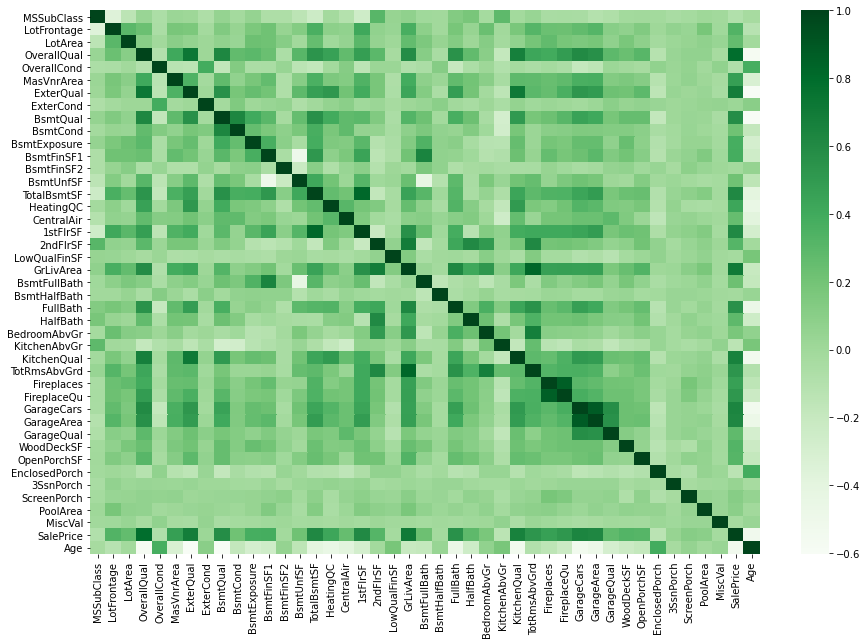

In [39]:
plt.figure(figsize=[15,10])
sns.heatmap(house_df.corr(), cmap='Greens')
plt.show()

- From above heat map we can infer that not much variables are corelated with each other.

- Checking distribution of target varaible

In [40]:
house_df['SalePrice'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

- Plotting target varaible.

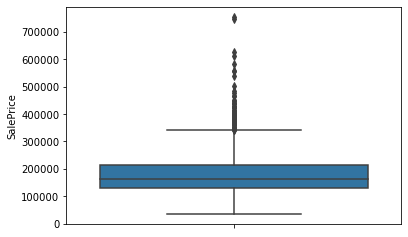

In [41]:
sns.boxplot(y=house_df.SalePrice, data=house_df)
plt.show()

- since our target varaible contains outliers, we have to transform our data, in this case we will be using Log transform.

In [42]:
house_df['SalePrice']=np.log(house_df['SalePrice'])

- After transforming looking at plot of target variable.

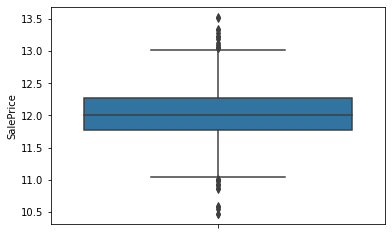

In [43]:
sns.boxplot(y=house_df.SalePrice, data=house_df)
plt.show()

- Now it seems better than earlier.

## Dummy Variable Creation -

- Creating list of columns which are categorical in nature and required dummies.

In [44]:
catog_df = house_df.select_dtypes(include=['object'])

- Let's start with first running the pd.get_dummies() function on our categorical variables of 'Object' type

In [45]:
dummy = pd.get_dummies(house_df[catog_df.columns], drop_first=True)
dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_ConLw,SaleType_New,SaleType_OthersSaleType,SaleType_WD,SaleCondition_Normal,SaleCondition_OthersSaleCondition,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


- We will now drop the original columns used for creating dummy variables

In [46]:
house_df = house_df.drop(house_df[catog_df.columns], axis =1)

- All good. Let's join the dummy dataframe with our origial dataframe

In [47]:
house_df = pd.concat([house_df, dummy], axis=1)

- Verifying the data types and columns in our dataframe after the dummy variable setup

In [48]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 138 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(40), uint8(95)
memory usage: 626.0 KB


In [49]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_ConLw,SaleType_New,SaleType_OthersSaleType,SaleType_WD,SaleCondition_Normal,SaleCondition_OthersSaleCondition,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,4,3,4,3,...,0,0,1,0,0,0,1,1,0,0
1,20,80.0,9600,6,8,0.0,3,3,4,3,...,0,0,1,0,0,0,1,1,0,0
2,60,68.0,11250,7,5,162.0,4,3,4,3,...,0,0,1,0,0,0,1,1,0,0
3,70,60.0,9550,7,5,0.0,3,3,3,4,...,0,0,1,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,350.0,4,3,4,3,...,0,0,1,0,0,0,1,1,0,0


## Train_Test Split

- Importing the library to perform the train-test split for modelling

In [50]:
import sklearn
from sklearn.model_selection import train_test_split

- Let's start with splitting the dataframe into df_train and df_test with 7:3 ratio

In [51]:
df_train, df_test = train_test_split(house_df, train_size=0.7, random_state=100)

- Verifying the shape for our new dataframes

In [52]:
print(df_train.shape)
print(df_test.shape)

(1021, 138)
(439, 138)


- We will now import the target variable from our train set to 'y_train' and the rest of the dataframe to 'X_train'
- And same will be applied to test set as well to get 'y_test' and 'X_test'. 

In [53]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(1021,)
(1021, 137)
(439,)
(439, 137)


## Scaling the train set

- Importing the library required for scaling and initializing our scaler function

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- We will now obtain the numerical columns from our 'X_train' dataframe and scale them using Standard scaling

In [55]:
nums = X_train.select_dtypes(include=['int64','float64']).columns
X_train[nums] = scaler.fit_transform(X_train[nums])

- After fitting and transforming train data set lets transform test data as well for same scalar.

In [56]:
X_test[nums] = scaler.transform(X_test[nums])

## Feature Selection using RFE

- Importing the required libraries and obtaining the top 50 variables using RFE

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linreg = LinearRegression()

rfe = RFE(linreg, 50)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)

- Let's see the rankings for all the columns we have obtained after RFE selection

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 19),
 ('LotFrontage', False, 53),
 ('LotArea', False, 52),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 72),
 ('ExterQual', False, 87),
 ('ExterCond', False, 84),
 ('BsmtQual', False, 30),
 ('BsmtCond', False, 67),
 ('BsmtExposure', False, 26),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 43),
 ('CentralAir', False, 69),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 12),
 ('BsmtHalfBath', False, 82),
 ('FullBath', False, 49),
 ('HalfBath', False, 56),
 ('BedroomAbvGr', False, 59),
 ('KitchenAbvGr', False, 35),
 ('KitchenQual', False, 55),
 ('TotRmsAbvGrd', False, 33),
 ('Fireplaces', False, 57),
 ('FireplaceQu', False, 16),
 ('GarageCars', True, 1),
 ('GarageArea', False, 85),
 ('GarageQual', False, 18),
 ('WoodDeckSF', False, 75),
 ('OpenPorchSF', False, 88),
 ('EnclosedP

- Separating all the supported columns into 'col' list

In [59]:
col = X_train.columns[rfe.support_]

- Listing out all the columns which were eliminated by RFE

In [60]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'LotShape_IR2', 'LotShape_Reg',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_OthersNeighborhood',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_OthersCondition1', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_TwnhsE', 'Ho

- taking only top 50 columns in train data

In [61]:
X_train=X_train[col]
X_train.shape

(1021, 50)

- Taking top 50 features of test data

In [62]:
X_test=X_test[col]

In [63]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
X_train.columns

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_Twnhs',
       'HouseStyle_2Story', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_OthersExterior1st',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_OthersExterior2nd', 'Exterior2nd_Wd Shng',
       'Foundation_PConc', 'BsmtFinType1_LwQ', 'BsmtFinType1_Unf',
       'BsmtFinType2_BLQ', 'BsmtFinType2_NoBasementFinType2',
       'GarageFinish_Unf', 'Fence_GdWo', 'SaleType_New',
       'Sa

## Ridge and Lasso Regression

Let's now try predicting SalePrice, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [64]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [66]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha_ridge = (model_cv.best_params_)["alpha"]
ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.0979436   0.05201365  0.00921471  0.0104444  -0.00615694  0.00720422
  0.0478604   0.04819682  0.0890163   0.05912039 -0.05222185  0.06645388
  0.04306258  0.16120219  0.1076053  -0.00768257  0.02126211  0.02863373
  0.02758085  0.01325264  0.01873862  0.02670137 -0.02134759  0.01724539
  0.03229614  0.02960514  0.02533363 -0.02285997 -0.02205144 -0.02024118
 -0.05010128 -0.04160815 -0.0293935  -0.02629768 -0.04255498 -0.04528309
 -0.01540535 -0.00669046  0.01768    -0.01053983 -0.02618108 -0.00701367
 -0.02724721 -0.0214891  -0.00851105  0.01508508  0.0118722   0.02953349
  0.00920237  0.01508508]


In [67]:
from sklearn.metrics import r2_score, mean_squared_error
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score Train : ",round(r2_train,2))
metric2.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Score Test : ",round(r2_test,2))
metric2.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train : ",round(rss1,2))
metric2.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test : ",round(rss2,2))
metric2.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE of Train : ",round(mse_train,2))
metric2.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE of Test : ",round(mse_test,2))
metric2.append(mse_test**0.5)

R2 Score Train :  0.89
R2 Score Test :  0.69
RSS of Train :  16.86
RSS of Test :  22.4
MSE of Train :  0.02
MSE of Test :  0.05


## Lasso Regression

- Hyperparameter tunning lasso model on alpha values used in  hyperparameter tunning ridge model to get best value of Alpha

In [68]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [70]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha_lasso = (model_cv.best_params_)["alpha"]

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

- Looking at coefficient we get from lasso model

In [71]:
lasso.coef_

array([ 0.09822201,  0.05184447,  0.01552805,  0.01261485, -0.        ,
        0.00035169,  0.04045332,  0.03937994,  0.09935118,  0.05928005,
       -0.05221941,  0.07120779,  0.04534685,  0.17025922,  0.11543212,
       -0.00758074,  0.02116406,  0.02868976,  0.02740501,  0.01320801,
        0.01857282,  0.02657459, -0.02130353,  0.01718683,  0.03221935,
        0.02929462,  0.02529433, -0.02286439, -0.02184837, -0.01954838,
       -0.0490643 , -0.04042272, -0.02894673, -0.02552318, -0.04106577,
       -0.04424958, -0.01495541, -0.00653005,  0.01740252, -0.01052944,
       -0.02620433, -0.00695974, -0.02737328, -0.0215048 , -0.00833621,
        0.0106671 ,  0.01183935,  0.02894639,  0.00899456,  0.01903213])

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score Train : ",round(r2_train,2))
metric3.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Score Test : ",round(r2_test,2))
metric3.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train : ",round(rss1,2))
metric3.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test : ",round(rss2,2))
metric3.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE of Train : ",round(mse_train,2))
metric3.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE of Test : ",round(mse_test,2))
metric3.append(mse_test**0.5)

R2 Score Train :  0.89
R2 Score Test :  0.67
RSS of Train :  16.85
RSS of Test :  23.69
MSE of Train :  0.02
MSE of Test :  0.05


In [73]:
# Creating a table which contain all the metrics

score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

metric = pd.DataFrame(score_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.894927,0.894965
1,R2 Score (Test),0.690404,0.672607
2,RSS (Train),16.858315,16.852275
3,RSS (Test),22.400382,23.688126
4,MSE (Train),0.128497,0.128474
5,MSE (Test),0.225889,0.232291


## Lets observe the changes in the coefficients after regularization

In [74]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(50)

,Ridge,Lasso
OverallQual,0.097944,0.098222
OverallCond,0.052014,0.051844
BsmtFinSF1,0.009215,0.015528
BsmtFinSF2,0.010444,0.012615
BsmtUnfSF,-0.006157,-0.000000
TotalBsmtSF,0.007204,0.000352
1stFlrSF,0.047860,0.040453
2ndFlrSF,0.048197,0.039380
GrLivArea,0.089016,0.099351
GarageCars,0.059120,0.059280


- Getting top 5 features based on lasso model

In [75]:
betas.sort_values(ascending=False,by=['Lasso']).head(5)

,Ridge,Lasso
MSZoning_RL,0.161202,0.170259
MSZoning_RM,0.107605,0.115432
GrLivArea,0.089016,0.099351
OverallQual,0.097944,0.098222
MSZoning_FV,0.066454,0.071208


- Getting top 5 features based on ridge model

In [76]:
betas.sort_values(ascending=False,by=['Ridge']).head(5)

,Ridge,Lasso
MSZoning_RL,0.161202,0.170259
MSZoning_RM,0.107605,0.115432
OverallQual,0.097944,0.098222
GrLivArea,0.089016,0.099351
MSZoning_FV,0.066454,0.071208


# Summary

### Evaluation of Ridge model
- R2 Score Train :  0.895
- R2 Score Test :  0.69
- RSS of Train :  16.85
- RSS of Test :  24.09
- MSE of Train :  0.13
- MSE of Test :  0.23


### Evaluation of Lasso model
- R2 Score Train :  0.894
- R2 Score Test :  0.67
- RSS of Train :  16.85
- RSS of Test :  23.69
- MSE of Train :  0.13
- MSE of Test :  0.23


### Based on above evaluation Ridge model is little better than Lasso model.
- for further use will be using Ridge model for evaluation.

- Arranging variables in descending order on the basis of Ridge coefficient

In [99]:
features=betas.Ridge.sort_values(ascending = False)

- Removing varaibles with 0 coefficient and looking at the shape of Important features i.e. used in Ridge model.

In [100]:
Impfeature=betas[(betas.Ridge!=0)]
Impfeature.shape

(50, 4)

## Significant variables which play role in predicting the price of a house

In [101]:
Impfeature.Ridge

OverallQual                          0.097944
OverallCond                          0.052014
BsmtFinSF1                           0.009215
BsmtFinSF2                           0.010444
BsmtUnfSF                           -0.006157
TotalBsmtSF                          0.007204
1stFlrSF                             0.047860
2ndFlrSF                             0.048197
GrLivArea                            0.089016
GarageCars                           0.059120
Age                                 -0.052222
MSZoning_FV                          0.066454
MSZoning_RH                          0.043063
MSZoning_RL                          0.161202
MSZoning_RM                          0.107605
LotShape_IR3                        -0.007683
LandContour_HLS                      0.021262
LandContour_Low                      0.028634
LandContour_Lvl                      0.027581
LotConfig_CulDSac                    0.013253
Neighborhood_ClearCr                 0.018739
Neighborhood_Crawfor              

## variables describe the price of a house 69% correctly  (Check)

## Alpha values
- Ridge Model : 2
- Lasso Model : 0.0001

## Subjective Questions:

- Question 1
- Doubling values of alpha

In [80]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha = alpha_ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.0979436   0.05201365  0.00921471  0.0104444  -0.00615694  0.00720422
  0.0478604   0.04819682  0.0890163   0.05912039 -0.05222185  0.06645388
  0.04306258  0.16120219  0.1076053  -0.00768257  0.02126211  0.02863373
  0.02758085  0.01325264  0.01873862  0.02670137 -0.02134759  0.01724539
  0.03229614  0.02960514  0.02533363 -0.02285997 -0.02205144 -0.02024118
 -0.05010128 -0.04160815 -0.0293935  -0.02629768 -0.04255498 -0.04528309
 -0.01540535 -0.00669046  0.01768    -0.01053983 -0.02618108 -0.00701367
 -0.02724721 -0.0214891  -0.00851105  0.01508508  0.0118722   0.02953349
  0.00920237  0.01508508]


- Calculating evaluation parameter of a model like R2 score, RSS and MSE on both training and test

In [81]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric5 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score Train : ",round(r2_train,2))
metric5.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Score Test : ",round(r2_test,2))
metric5.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train : ",round(rss1,2))
metric5.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test : ",round(rss2,2))
metric5.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE of Train : ",round(mse_train,2))
metric5.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE of Test : ",round(mse_test,2))
metric5.append(mse_test**0.5)

R2 Score Train :  0.89
R2 Score Test :  0.69
RSS of Train :  16.86
RSS of Test :  22.4
MSE of Train :  0.02
MSE of Test :  0.05


In [82]:
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised
alpha = alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[ 0.09822201  0.05184447  0.01552805  0.01261485 -0.          0.00035169
  0.04045332  0.03937994  0.09935118  0.05928005 -0.05221941  0.07120779
  0.04534685  0.17025922  0.11543212 -0.00758074  0.02116406  0.02868976
  0.02740501  0.01320801  0.01857282  0.02657459 -0.02130353  0.01718683
  0.03221935  0.02929462  0.02529433 -0.02286439 -0.02184837 -0.01954838
 -0.0490643  -0.04042272 -0.02894673 -0.02552318 -0.04106577 -0.04424958
 -0.01495541 -0.00653005  0.01740252 -0.01052944 -0.02620433 -0.00695974
 -0.02737328 -0.0215048  -0.00833621  0.0106671   0.01183935  0.02894639
  0.00899456  0.01903213]


- Calculating evaluation parameter of a model like R2 score, RSS and MSE on both training and test

In [83]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric6 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score Train : ",round(r2_train,2))
metric6.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Score Test : ",round(r2_test,2))
metric6.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train : ",round(rss1,2))
metric6.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test : ",round(rss2,2))
metric6.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE of Train : ",round(mse_train,2))
metric6.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE of Test : ",round(mse_test,2))
metric6.append(mse_test**0.5)

R2 Score Train :  0.89
R2 Score Test :  0.67
RSS of Train :  16.85
RSS of Test :  23.69
MSE of Train :  0.02
MSE of Test :  0.05


In [84]:
ridge_metric1 = pd.Series(metric5, name = 'Ridge Regression 2*Alpha')
lasso_metric1 = pd.Series(metric6, name = 'Lasso Regression 2*Alpha')

- Conactinating old score metric with new one.

In [85]:
final_metric = pd.concat([ final_metric,ridge_metric1, lasso_metric1], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression,Ridge Regression 2*Alpha,Lasso Regression 2*Alpha
0,R2 Score (Train),0.894927,0.894965,0.894927,0.894965
1,R2 Score (Test),0.690404,0.672607,0.690404,0.672607
2,RSS (Train),16.858315,16.852275,16.858315,16.852275
3,RSS (Test),22.400382,23.688126,22.400382,23.688126
4,MSE (Train),0.128497,0.128474,0.128497,0.128474
5,MSE (Test),0.225889,0.232291,0.225889,0.232291


- Adding ridge and lasso coefficint to old data

In [86]:
betas['Ridge1'] = ridge.coef_
betas['Lasso1'] = lasso.coef_

In [87]:
betas.head(50)

,Ridge,Lasso,Ridge1,Lasso1
OverallQual,0.097944,0.098222,0.097944,0.098222
OverallCond,0.052014,0.051844,0.052014,0.051844
BsmtFinSF1,0.009215,0.015528,0.009215,0.015528
BsmtFinSF2,0.010444,0.012615,0.010444,0.012615
BsmtUnfSF,-0.006157,-0.000000,-0.006157,-0.000000
TotalBsmtSF,0.007204,0.000352,0.007204,0.000352
1stFlrSF,0.047860,0.040453,0.047860,0.040453
2ndFlrSF,0.048197,0.039380,0.048197,0.039380
GrLivArea,0.089016,0.099351,0.089016,0.099351
GarageCars,0.059120,0.059280,0.059120,0.059280


- Top 5 features of lasso model

In [88]:
betas.sort_values(ascending=False,by=['Lasso1']).head(5)

,Ridge,Lasso,Ridge1,Lasso1
MSZoning_RL,0.161202,0.170259,0.161202,0.170259
MSZoning_RM,0.107605,0.115432,0.107605,0.115432
GrLivArea,0.089016,0.099351,0.089016,0.099351
OverallQual,0.097944,0.098222,0.097944,0.098222
MSZoning_FV,0.066454,0.071208,0.066454,0.071208


- Top 5 features of ridge model

In [89]:
betas.sort_values(ascending=False,by=['Ridge1']).head(5)

,Ridge,Lasso,Ridge1,Lasso1
MSZoning_RL,0.161202,0.170259,0.161202,0.170259
MSZoning_RM,0.107605,0.115432,0.107605,0.115432
OverallQual,0.097944,0.098222,0.097944,0.098222
GrLivArea,0.089016,0.099351,0.089016,0.099351
MSZoning_FV,0.066454,0.071208,0.066454,0.071208


- Question 3

- removing top 5 features from our data to 

In [90]:

X_train=X_train.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','MSZoning_RL'], axis =1)
X_test=X_test.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','MSZoning_RL'], axis =1)

In [91]:
X_train.shape

(1021, 45)

- Hyperparameter tunning for new lasso model

In [92]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [94]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = model_cv.best_params_["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

- Looking at coefficient we get from lasso model

In [95]:
lasso.coef_

array([ 0.01576318,  0.01540793, -0.00393155,  0.        ,  0.17917474,
        0.15704888, -0.08816173, -0.0115161 , -0.00447152, -0.01744237,
       -0.01216577,  0.03012279,  0.02735927,  0.03261769,  0.02047741,
        0.01392854,  0.03681122, -0.03692564,  0.02049244,  0.05152945,
        0.03926653,  0.02564929, -0.03220722, -0.01227678, -0.00678603,
       -0.01916944, -0.0120778 , -0.0125464 , -0.00630196, -0.00227774,
       -0.01521287, -0.0156609 , -0.001061  ,  0.03224748, -0.01232516,
       -0.02184371, -0.00464762, -0.03997382, -0.0136354 , -0.01342483,
        0.01408033,  0.00212144,  0.04401915,  0.0041383 ,  0.02420325])

In [96]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric7 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score Train : ",round(r2_train,2))
metric7.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Score Test : ",round(r2_test,2))
metric7.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train : ",round(rss1,2))
metric7.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test : ",round(rss2,2))
metric7.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE of Train : ",round(mse_train,2))
metric7.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE of Test : ",round(mse_test,2))
metric7.append(mse_test**0.5)

R2 Score Train :  0.83
R2 Score Test :  0.7
RSS of Train :  27.64
RSS of Test :  21.76
MSE of Train :  0.03
MSE of Test :  0.05


In [97]:
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso'] = lasso.coef_
betas1.head()

,Lasso
BsmtFinSF1,0.015763
BsmtFinSF2,0.015408
BsmtUnfSF,-0.003932
TotalBsmtSF,0.000000
1stFlrSF,0.179175


- Top 5 features of new Lasso model most important.

In [98]:
betas1.sort_values(ascending=False,by=['Lasso']).head(5)

,Lasso
1stFlrSF,0.179175
2ndFlrSF,0.157049
Neighborhood_NridgHt,0.051529
SaleCondition_Normal,0.044019
Neighborhood_Somerst,0.039267
